In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Numerical Data Plotting

In [5]:
data = sns.load_dataset('tips') # Seaborn has some inbuilt dataset
data # This data comes in form of a panda data frame

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
data.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

#### Relational Plot and scatter plot

The relationship between two variables using scatter plot 

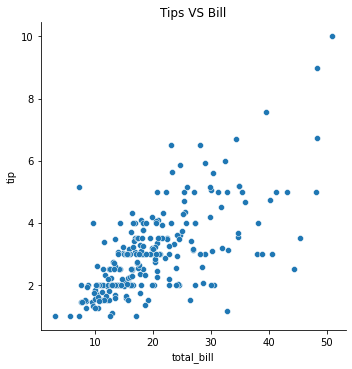

In [38]:
sns.relplot(x='total_bill', y='tip', data=data)
plt.title('Tips VS Bill')
plt.show()

# There is a linear relationship between the total bill and tip

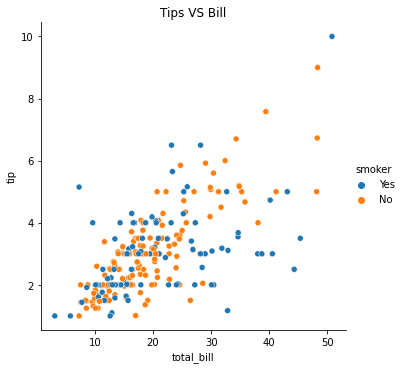

In [39]:
sns.relplot(x='total_bill', y='tip', data=data, hue='smoker') # hue categorise it
plt.title('Tips VS Bill')
plt.show()

In [26]:
# We can check the number of smokers
data.smoker.count()

244

In [21]:
# We can also check the two categories number
data.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [23]:
data.smoker.values # This shows all the values that are in the column

['No', 'No', 'No', 'No', 'No', ..., 'No', 'Yes', 'Yes', 'No', 'No']
Length: 244
Categories (2, object): ['Yes', 'No']

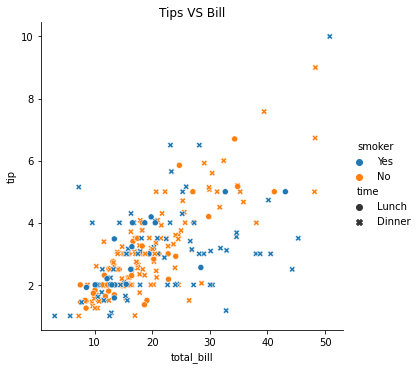

In [40]:
# Style
sns.relplot(data=data, x='total_bill', y='tip',  hue='smoker', style='time') # hue categorise it, but it is a bad idea to use two much categories to differentiate
plt.title('Tips VS Bill')
plt.show()

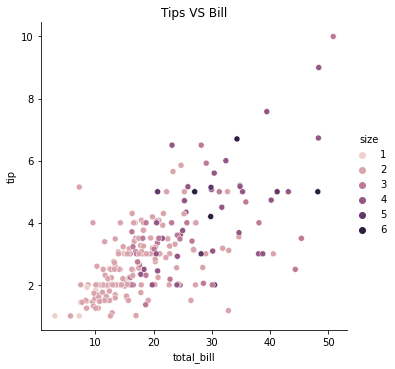

In [41]:
sns.relplot(data=data, x='total_bill', y='tip', hue='size',) # Always use the string to represent the columns
plt.title('Tips VS Bill')
plt.show()
# This will categorise them by size

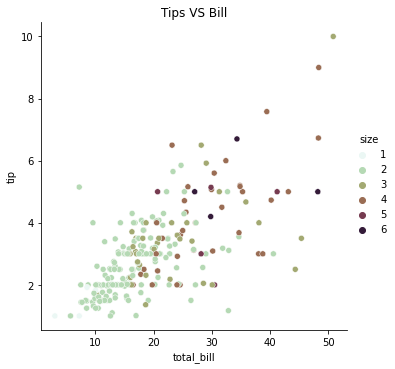

In [42]:
# changing the hue color
sns.relplot(data=data, x='total_bill', y='tip', hue='size', palette='ch:r=0.8, l=0.95') # add palette='ch:r=0.8, l=0.95'
plt.title('Tips VS Bill')
plt.show()

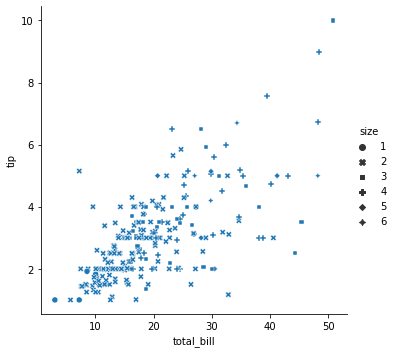

In [43]:
# Categorise using style
sns.relplot(data=data, x='total_bill', y='tip', style='size',) 
plt.title('Tips VS Bill')
plt.show()

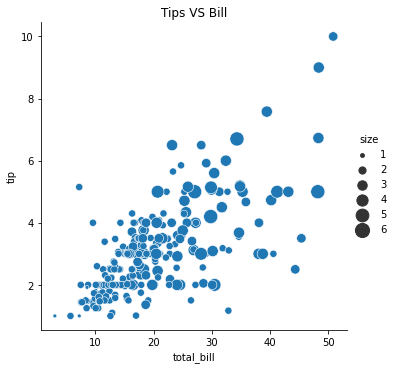

In [47]:
# Categorise using size
sns.relplot(data=data, x='total_bill', y='tip', size='size', sizes=(15,200))  # sizes will have min of radius 15 and max of radius 200
plt.title('Tips VS Bill')
plt.show()

In [52]:
from numpy.random import randn

# Use the example below to understand the cumlative some
x = randn(2)
c_x = x.cumsum()
print(x)
print(c_x)

[ 0.92746802 -0.55897703]
[0.92746802 0.36849099]


### Line plot

In [65]:
data_random_dict = dict(time = np.arange(501), value = randn(501).cumsum())
random_data = pd.DataFrame(data_random_dict)


In [66]:
random_data

,time,value
0,0,0.511285
1,1,0.239280
2,2,1.492050
3,3,2.971961
4,4,3.741649
...,...,...
496,496,3.045298
497,497,3.238571
498,498,4.439115
499,499,5.126525


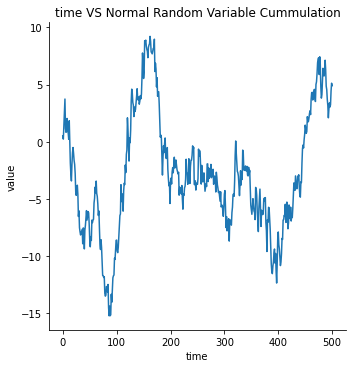

In [70]:
sns.relplot(data=random_data, x='time', y='value', kind='line', sort=False)  # To sort the x axis if it is not ordered 
plt.title('time VS Normal Random Variable Cummulation')
plt.show()

### Aggregated Data

In [73]:
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


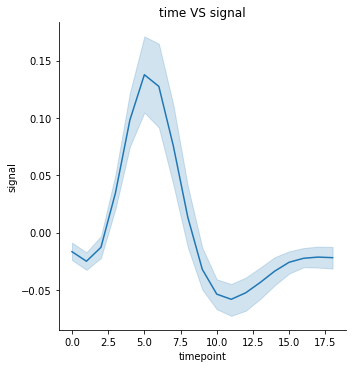

In [79]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', ) # Confidence of this is 0.95 
plt.title('time VS signal')
plt.show()

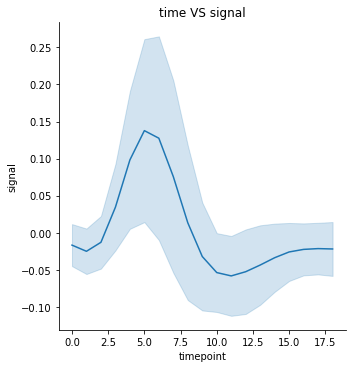

In [82]:
# We can also use standard deviation to represent the confidence interval ci
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', ci='sd') # Confidence of this is 0.95 
plt.title('time VS signal')
plt.show()

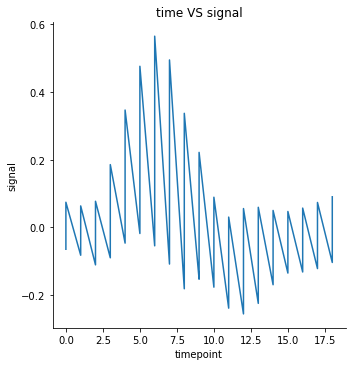

In [84]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', estimator=None) #  This gives the value gotten not the average 
plt.title('time VS signal')
plt.show()

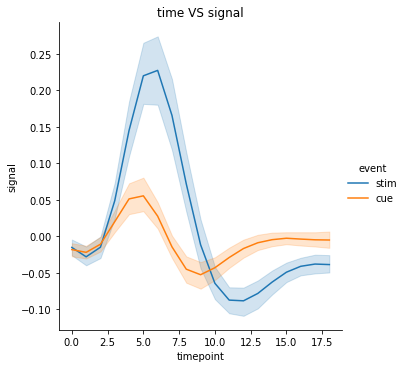

In [86]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='event') #  The signals for stim and cue
plt.title('time VS signal')
plt.show()

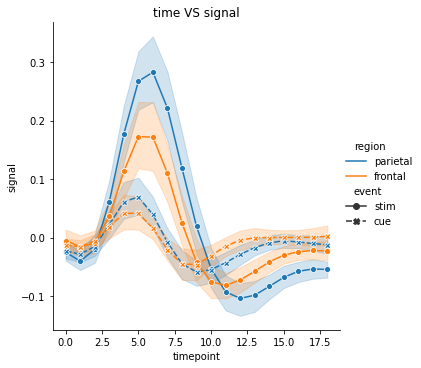

In [89]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line', hue='region', style='event', markers=True) #  The signals for stim and cue
plt.title('time VS signal')
plt.show()